In [36]:
cd "E:/style_transfer/style_transfer/"

E:\style_transfer\style_transfer


In [20]:
PATH_OF_DATA= 'E:/style_transfer/style_transfer/pics'


In [23]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 28DB-1296

 Directory of E:\style_transfer\style_transfer\pics

10/16/2019  07:03 PM    <DIR>          .
10/16/2019  07:03 PM    <DIR>          ..
10/16/2019  05:52 AM            84,771 1.jpg
10/16/2019  05:52 AM           186,463 2.jpg
10/16/2019  05:52 AM            70,662 3.jpg
10/16/2019  05:52 AM            85,373 4.jpg
10/16/2019  05:52 AM            56,808 8.jpg
               5 File(s)        484,077 bytes
               2 Dir(s)  133,633,757,184 bytes free


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models
import os
from torchvision import datasets


In [2]:
def normalize_batch(batch):
    # normalize using imagenet mean and std
    mean = batch.new_tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
    std = batch.new_tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)
    batch = batch.div_(255.0)
    return (batch - mean) / std

In [3]:
dataset=datasets.ImageFolder(root="./pics",
                                transform=transforms.Compose([
                                
                                transforms.Resize((600,600)),
                                transforms.CenterCrop(512),
                                transforms.ToTensor()
                                
    
    
                   ]))


In [4]:
dataloader=torch.utils.data.DataLoader(dataset,shuffle=True,batch_size=4)

  


In [5]:
%run vgg.ipynb
device="cuda" 
VGG=VGG16().to(device)

ModuleNotFoundError: No module named 'google.colab'

NameError: name 'VGG16' is not defined

In [9]:
#%run transformation.ipynb
#transformer=Transformer().to(device)


Dataset ImageFolder
    Number of datapoints: 3116
    Root location: /
    StandardTransform
Transform: Compose(
               Resize(size=(512, 512), interpolation=PIL.Image.BILINEAR)
               ToTensor()
           )

In [ ]:
from 

torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])
torch.Size([3, 512, 512])


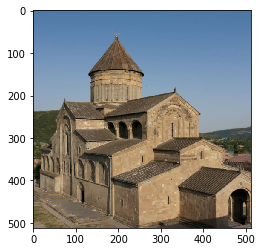

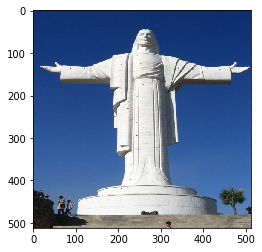

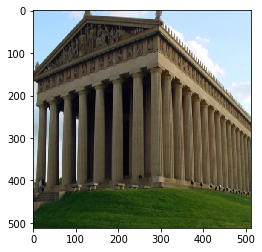

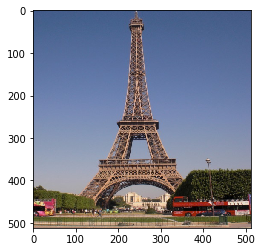

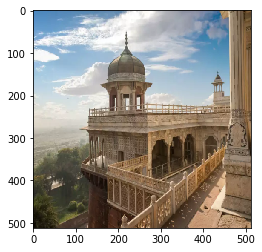

In [7]:
tpil=transforms.ToPILImage()
pilt=transforms.ToTensor()

def ishow(imgt):
  imgt=imgt.squeeze(0)
  img=tpil(imgt)
  plt.figure()
  plt.imshow(img)
  
for i,(img,_) in enumerate(dataloader):
  bt=len(img)
  for x in range(bt):
    print(img[x].size())
    ishow(img[x].unsqueeze(0))
    

In [0]:
transform=transforms.Compose([
                                
                                transforms.Resize((512,512)),
                                transforms.ToTensor(),
                                
    
    
                   ])

In [0]:
def gram_matrix(y):
    (b, ch, h, w) = y.size()
    features = y.view(b, ch, w * h)
    features_t = features.transpose(1, 2)
    gram = features.bmm(features_t) / (ch * h * w)
    return gram

In [0]:

%run t0.ipynb
trans=TransformerNet().to(device)

In [0]:
mse_loss = torch.nn.MSELoss()
optimizer = optim.Adam(trans.parameters(), lr=.003)

In [22]:
import time
start_time = time.time()
SAVE_MODEL_PATH= "images/model"+ ".pth"
path="modern.jpg"
style_img=Image.open(path)
style_img=transform(style_img)
style_img=normalize_batch(style_img).to(device)
style_img = style_img.repeat(4, 1, 1, 1)
features_style=VGG(style_img)

gram_style = [gram_matrix(y) for y in features_style]

content_weight=50
style_weight=25
epochs=200
while(epochs):
  epochs-=1
  agg_content=0
  agg_style=0
  for i,(imag,_) in enumerate(dataloader):
    n_batch = len(imag)
    optimizer.zero_grad()
    x=imag.to(device)
    
    
    
    
    
    y=trans(x)
    
    y = normalize_batch(y)
    x = normalize_batch(x)
    
    y_hat=VGG(y)
    x_hat=VGG(x)
    
    
    content_loss=content_weight*mse_loss(x_hat.relu2_2,y_hat.relu2_2)
    
    
    style_loss=0
    for ps,gs in zip(y_hat,gram_style):
      p_s=gram_matrix(ps)
      style_loss+=style_weight*mse_loss(p_s,gs[:n_batch, :, :])
      
    total_loss=content_loss+style_loss
    total_loss.backward()
    
    optimizer.step()
    
    agg_content+=content_loss
    agg_style+=style_loss
    
    
    
    
  # Print Losses
  print("content_loss{},style_loss{},epochs{}".format((agg_content/(i+1)),(agg_style/(i+1)),epochs))
  print("Time elapsed:\t{} seconds".format(time.time()-start_time))

  # Save Model
  checkpoint_path = SAVE_MODEL_PATH + ".pth"
  torch.save(trans.state_dict(), checkpoint_path)
  print("Saved TransformerNetwork checkpoint file at {}".format(checkpoint_path)) 
  
  
      
    
    
    
      
      
    
    
    
  


content_loss0.7227295637130737,style_loss5.551303183892742e-05,epochs199
Time elapsed:	6.643182039260864 seconds
Saved TransformerNetwork checkpoint file at images/model.pth.pth
content_loss0.34452301263809204,style_loss0.0001388872042298317,epochs198
Time elapsed:	12.510546922683716 seconds
Saved TransformerNetwork checkpoint file at images/model.pth.pth
content_loss0.18071676790714264,style_loss0.00010031479177996516,epochs197
Time elapsed:	18.37427282333374 seconds
Saved TransformerNetwork checkpoint file at images/model.pth.pth
content_loss0.1499650478363037,style_loss8.561754657421261e-05,epochs196
Time elapsed:	24.18910789489746 seconds
Saved TransformerNetwork checkpoint file at images/model.pth.pth
content_loss0.1439637392759323,style_loss9.00495215319097e-05,epochs195
Time elapsed:	30.039299726486206 seconds
Saved TransformerNetwork checkpoint file at images/model.pth.pth
content_loss0.13643693923950195,style_loss9.564889478497207e-05,epochs194
Time elapsed:	35.89189910888672 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-6b2871b59f33>", line 58, in <module>
    print("content_loss{},style_loss{},epochs{}".format((agg_content/(i+1)),(agg_style/(i+1)),epochs))
  File "/usr/local/lib/python3.6/dist-packages/torch/tensor.py", line 340, in __format__
    return self.item().__format__(format_spec)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/I

KeyboardInterrupt: ignored

In [23]:
for x in range(2,8):
  img="pics/"+str(x)+".jpg"
  img=Image.open(img)
  img=pilt(img)
  img=img.unsqueeze(0).to(device)
  img=trans(img)
  ishow(img.cpu())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-6f1603526e2e>", line 3, in <module>
    img=Image.open(img)
  File "/usr/local/lib/python3.6/dist-packages/PIL/Image.py", line 2530, in open
    fp = builtins.open(filename, "rb")
OSError: [Errno 107] Transport endpoint is not connected: 'images/2.jpg'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records


OSError: ignored

In [0]:
    trans.eval()
    trans.cpu()
    final_path = SAVE_MODEL_PATH + "transformer_weight.pth"
    print("Saving TransformerNetwork weights at {}".format(final_path))
    torch.save(trans.state_dict(), final_path)
    print("Done saving final model")